In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from tabulate import _table_formats, tabulate

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import model_selection
from sklearn import metrics

In [2]:
datas = '/Users/pkrok/OneDrive/Python/Giannakopoulos/MyData.xlsx'

In [3]:
pd.set_option("display.max_columns", None)
df=pd.read_excel(datas)
df.head(2)
df['logD'] = np.log10(df['diffusivity'])
#df = df.dropna()

# Keep only the columns I need

In [4]:
df=df[[ 'aperture', 'size - van der Waals (Å)','mass', 'ascentricF', 'logD', 'size - kinetic diameter (Å)', 'ionicRad', 
       'Μ-N_lff', 'Μ-N_kFF', 'ionicRad', 'MetalCharge',
       'apertureAtom_σ', 'apertureAtom_e', 'linker_length1', 'linker_length2',
       'linker_length3', 'linker_mass1', 'linker_mass2', 'linker_mass3',
       'func1_length', 'func2_length', 'func3_length', 'func1_mass',
       'func2_mass', 'func3_mass', 'func1_charge', 'func2_charge',
       'func3_charge',]]
df.head()

,aperture,size - van der Waals (Å),mass,ascentricF,logD,size - kinetic diameter (Å),ionicRad,Μ-N_lff,Μ-N_kFF,ionicRad,MetalCharge,apertureAtom_σ,apertureAtom_e,linker_length1,linker_length2,linker_length3,linker_mass1,linker_mass2,linker_mass3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,func1_charge,func2_charge,func3_charge
0,3.92,2.66,4.002,-0.390,-7.221849,2.60,92,2.257,45354.6,92,1.1901,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
1,3.92,2.76,2.010,-0.217,-7.301030,2.89,92,2.257,45354.6,92,1.1901,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
2,3.92,2.94,31.999,0.022,-8.000000,3.46,92,2.257,45354.6,92,1.1901,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
3,3.92,3.24,44.010,0.225,-8.397940,3.30,92,2.257,45354.6,92,1.1901,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
4,3.92,3.13,28.000,0.037,-8.301030,3.64,92,2.257,45354.6,92,1.1901,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001


# Bring my data into shape

In [5]:
df=df.rename(columns={'size - van der Waals (Å)':'diameter', 'size - kinetic diameter (Å)':'kdiameter', 'apertureAtom_e':'e' })

In [6]:
df = df.dropna()
df=df.reset_index(drop=True)
df

,aperture,diameter,mass,ascentricF,logD,kdiameter,ionicRad,Μ-N_lff,Μ-N_kFF,ionicRad,MetalCharge,apertureAtom_σ,e,linker_length1,linker_length2,linker_length3,linker_mass1,linker_mass2,linker_mass3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,func1_charge,func2_charge,func3_charge
0,3.92,2.66,4.002,-0.390,-7.221849,2.60,92,2.257,45354.60,92,1.1901,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
1,3.92,2.76,2.010,-0.217,-7.301030,2.89,92,2.257,45354.60,92,1.1901,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
2,3.92,2.94,31.999,0.022,-8.000000,3.46,92,2.257,45354.60,92,1.1901,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
3,3.92,3.24,44.010,0.225,-8.397940,3.30,92,2.257,45354.60,92,1.1901,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
4,3.92,3.13,28.000,0.037,-8.301030,3.64,92,2.257,45354.60,92,1.1901,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,2.95,2.76,2.010,-0.217,-7.455932,2.89,71,2.139,38994.88,71,1.9871,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2710,-0.2710,-0.2710
591,2.95,2.94,31.999,0.022,-9.180456,3.46,71,2.139,38994.88,71,1.9871,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2710,-0.2710,-0.2710
592,2.95,3.24,44.010,0.225,-9.096910,3.30,71,2.139,38994.88,71,1.9871,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2710,-0.2710,-0.2710
593,2.95,3.13,28.000,0.037,-9.638272,3.64,71,2.139,38994.88,71,1.9871,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2710,-0.2710,-0.2710


# Without K-fold

In [33]:
dfMetrics = pd.DataFrame(columns = ['data', 'testPerf', 'trainPerf', 'testMSE', 'trainMSE', 'testMaxEr', 'trainMaxEr', 'testMedABSErr', 'trainMedABSErr'])

GBR = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=0,loss='squared_error')
XGBR = XGBRegressor(n_estimators=200, max_depth=3, eta=0.2, subsample=0.8, colsample_bytree=0.8)

#make the test set
testdf=df.iloc[526:, 0:]
testx = np.asanyarray(testdf[['aperture', 'apertureAtom_σ', 'diameter', 'kdiameter', 'ascentricF', 'ionicRad','mass', 'linker_length1', 'linker_length2',
       'linker_length3', 'linker_mass1', 'linker_mass2', 'linker_mass3',
       'func1_length', 'func2_length', 'func3_length', 'func1_mass',
       'func2_mass', 'func3_mass','ionicRad','e','Μ-N_lff', 'Μ-N_kFF', 'ionicRad', 'MetalCharge','func1_charge', 'func2_charge',
       'func3_charge']])
testy = np.asanyarray(testdf[['logD']])   

i=0

for i in range(50, 525, 5):
    data_y1 = list()
    data_y2 = list()
    data_predTrain = list()
    data_predTest = list()
    dataTrueTest = list()
    
    df2=df.iloc[:i, :]
    x = np.asanyarray(df2[['aperture', 'apertureAtom_σ', 'diameter', 'kdiameter', 'ascentricF', 'ionicRad','mass', 'linker_length1', 'linker_length2',
       'linker_length3', 'linker_mass1', 'linker_mass2', 'linker_mass3',
       'func1_length', 'func2_length', 'func3_length', 'func1_mass',
       'func2_mass', 'func3_mass','ionicRad','e','Μ-N_lff', 'Μ-N_kFF', 'ionicRad', 'MetalCharge','func1_charge', 'func2_charge',
       'func3_charge']])
    y = np.asanyarray(df2[['logD']])
    
    XGBR.fit(x,y.ravel())
    pred_train = XGBR.predict(x)
    pred_test = XGBR.predict(testx)
        
    # evaluate
    R2_test = (metrics.r2_score(testy,pred_test))
    R2_train = (metrics.r2_score(y,pred_train))
    MSE_test = (metrics.mean_squared_error(testy,pred_test))
    MSE_train = (metrics.mean_squared_error(y,pred_train))
    MaxEr_test = metrics.max_error(testy,pred_test)
    MaxEr_train = metrics.max_error(y,pred_train)
    MedABSErr_test = metrics.median_absolute_error(testy,pred_test)
    MedABSErr_train = metrics.median_absolute_error(y,pred_train)
    
    dfMetrics.loc[i, 'testPerf'] = R2_test
    dfMetrics.loc[i, 'trainPerf'] = R2_train
    dfMetrics.loc[i, 'testMSE'] = MSE_test
    dfMetrics.loc[i, 'trainMSE'] = MSE_train
    dfMetrics.loc[i, 'testMaxEr'] = MaxEr_test
    dfMetrics.loc[i, 'trainMaxEr'] = MaxEr_train
    dfMetrics.loc[i, 'testMedABSErr'] = MedABSErr_test
    dfMetrics.loc[i, 'trainMedABSErr'] = MedABSErr_train
    dfMetrics.loc[i, 'data'] = i

In [34]:
len(testy)

69

In [35]:
len(pred_test)

69

<function matplotlib.pyplot.show(close=None, block=None)>

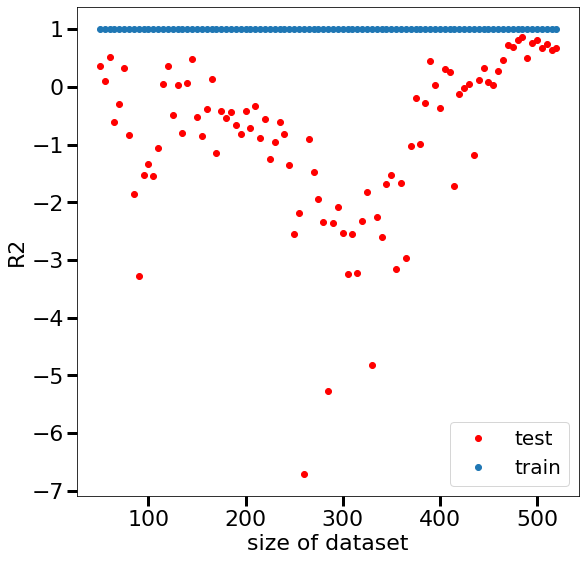

In [36]:
AxX=dfMetrics['data']

AxY=dfMetrics['testPerf']
AxY2=dfMetrics['trainPerf']
plt.plot(AxX, AxY, 'ro', label='test')
plt.plot(AxX, AxY2, 'o', label='train')

# plt.ylim(0.2, 1)
# plt.xlim(100, 700)
#plt.xscale('log')
plt.xlabel('size of dataset', fontsize=22)
plt.ylabel('R2',fontsize=22)
plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (9,9)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.legend(loc='lower right', fontsize=20)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

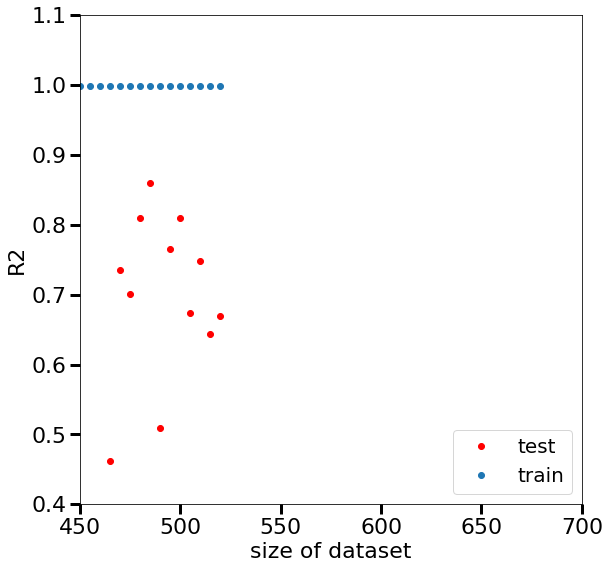

In [37]:
AxX=dfMetrics['data']
AxY=dfMetrics['testPerf']
AxY2=dfMetrics['trainPerf']
plt.plot(AxX, AxY, 'ro', label='test')
plt.plot(AxX, AxY2, 'o', label='train')

plt.ylim(0.4, 1.1)
plt.xlim(450, 700)
#plt.xscale('log')
plt.xlabel('size of dataset', fontsize=22)
plt.ylabel('R2',fontsize=22)
plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (9,9)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.legend(loc='lower right', fontsize=20)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

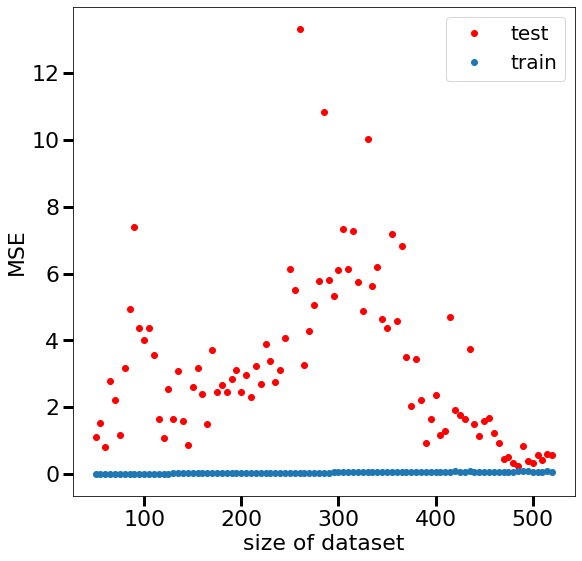

In [38]:
AxX=dfMetrics['data']
AxY=dfMetrics['testMSE']
AxY2=dfMetrics['trainMSE']
plt.plot(AxX, AxY, 'ro', label='test')
plt.plot(AxX, AxY2, 'o', label='train')

# plt.ylim(0, 11)
# plt.xlim(250, 600)
#plt.xscale('log')
plt.xlabel('size of dataset', fontsize=22)
plt.ylabel('MSE',fontsize=22)
plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (9,9)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.legend(loc='upper right', fontsize=20)

plt.show

## With K-fold Cross-Validation

In [15]:
from sklearn.model_selection import KFold

In [16]:
dfMetrics = pd.DataFrame(columns = ['data', 'testPerf', 'trainPerf', 'testMSE', 'trainMSE', 'testMaxEr', 'trainMaxEr', 'testMedABSErr', 'trainMedABSErr'])

XGBR = XGBRegressor(n_estimators=200, max_depth=3, eta=0.2, subsample=0.8, colsample_bytree=0.8)

kfold = KFold(n_splits=5, shuffle=True, random_state = None)

#make the test set
testdf=df.iloc[476:, 0:]
testx = np.asanyarray(testdf[['aperture', 'apertureAtom_σ', 'diameter', 'kdiameter', 'ascentricF', 'ionicRad','mass', 'linker_length1', 'linker_length2',
       'linker_length3', 'linker_mass1', 'linker_mass2', 'linker_mass3',
       'func1_length', 'func2_length', 'func3_length', 'func1_mass',
       'func2_mass', 'func3_mass','ionicRad','e','Μ-N_lff', 'Μ-N_kFF', 'ionicRad', 'MetalCharge','func1_charge', 'func2_charge',
       'func3_charge']])
testy = np.asanyarray(testdf[['logD']])  

i=0

for i in range(150, 475, 5):
    data_y1 = list()
    data_y2 = list()
    data_predTrain = list()
    data_predTest = list()
    dataTrueTest = list()
    
    df2=df.iloc[:i, :]
    x = np.asanyarray(df2[['aperture', 'apertureAtom_σ', 'diameter', 'kdiameter', 'ascentricF', 'ionicRad','mass', 'linker_length1', 'linker_length2',
       'linker_length3', 'linker_mass1', 'linker_mass2', 'linker_mass3',
       'func1_length', 'func2_length', 'func3_length', 'func1_mass',
       'func2_mass', 'func3_mass','ionicRad','e','Μ-N_lff', 'Μ-N_kFF', 'ionicRad', 'MetalCharge','func1_charge', 'func2_charge',
       'func3_charge']])
    y = np.asanyarray(df2[['logD']])

    # enumerate splits
    for train_ix, test_ix in kfold.split(x):
        # get data
        train_X, test_X = x[train_ix], x[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        
        # fit model
        XGBR.fit(train_X, train_y.ravel())
       
        # make predictions
        pred_train = XGBR.predict(train_X)
        pred_test = XGBR.predict(testx)
        
        #store
        data_y2.extend(train_y)
        data_predTrain.extend(pred_train)
        data_predTest.extend(pred_test)
        dataTrueTest.extend(testy)
        
    # evaluate
    R2_test = (metrics.r2_score(dataTrueTest,data_predTest))
    R2_train = (metrics.r2_score(data_y2,data_predTrain))
    MSE_test = (metrics.mean_squared_error(dataTrueTest,data_predTest))
    MSE_train = (metrics.mean_squared_error(data_y2,data_predTrain))
    MaxEr_test = metrics.max_error(dataTrueTest,data_predTest)
    MaxEr_train = metrics.max_error(data_y2,data_predTrain)
    MedABSErr_test = metrics.median_absolute_error(dataTrueTest,data_predTest)
    MedABSErr_train = metrics.median_absolute_error(data_y2,data_predTrain)
    
    dfMetrics.loc[i, 'testPerf'] = R2_test
    dfMetrics.loc[i, 'trainPerf'] = R2_train
    dfMetrics.loc[i, 'testMSE'] = MSE_test
    dfMetrics.loc[i, 'trainMSE'] = MSE_train
    dfMetrics.loc[i, 'testMaxEr'] = MaxEr_test
    dfMetrics.loc[i, 'trainMaxEr'] = MaxEr_train
    dfMetrics.loc[i, 'testMedABSErr'] = MedABSErr_test
    dfMetrics.loc[i, 'trainMedABSErr'] = MedABSErr_train
    dfMetrics.loc[i, 'data'] = i

In [17]:
len(testy)

119

In [18]:
len(pred_test)

119

<function matplotlib.pyplot.show(close=None, block=None)>

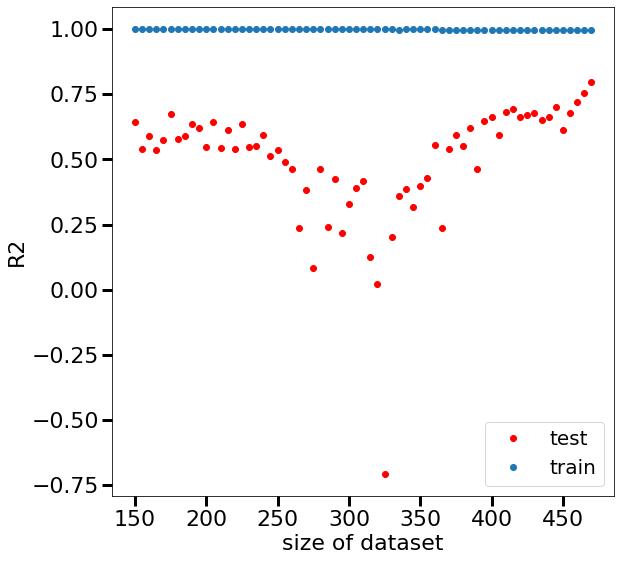

In [19]:
AxX=dfMetrics['data']
AxY=dfMetrics['testPerf']
AxY2=dfMetrics['trainPerf']
plt.plot(AxX, AxY, 'ro', label='test')
plt.plot(AxX, AxY2, 'o', label='train')

# plt.ylim(0.2, 1)
# plt.xlim(100, 700)
#plt.xscale('log')
plt.xlabel('size of dataset', fontsize=22)
plt.ylabel('R2',fontsize=22)
plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (9,9)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.legend(loc='lower right', fontsize=20)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

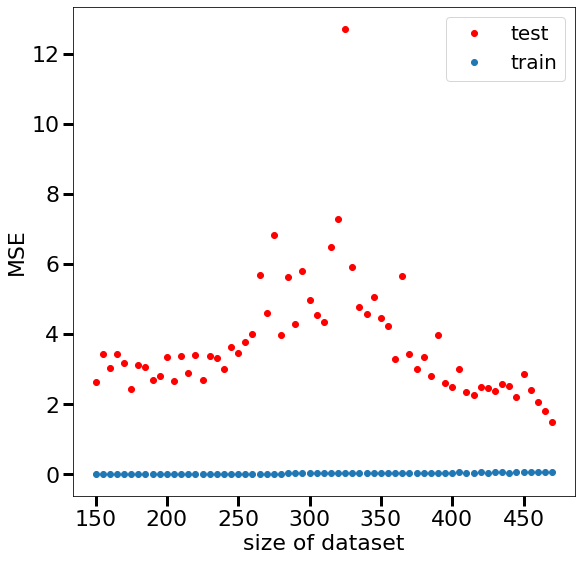

In [20]:
AxX=dfMetrics['data']
AxY=dfMetrics['testMSE']
AxY2=dfMetrics['trainMSE']
plt.plot(AxX, AxY, 'ro', label='test')
plt.plot(AxX, AxY2, 'o', label='train')

# plt.ylim(0, 11)
# plt.xlim(250, 600)
#plt.xscale('log')
plt.xlabel('size of dataset', fontsize=22)
plt.ylabel('MSE',fontsize=22)
plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (9,9)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.legend(loc='upper right', fontsize=20)

plt.show